# DAMASK tutorial for cold rolling test

- creating necessary inputs for damask
- defining the elastoplastic model (with powerlaw) for tensile test
- runing the damask jobs

here more option is given to the user to select from damask python package itself.

Author: Yang Bai

Date  : 06.09.2022

## Importing libraries and creatign Project

In [1]:
from pyiron_continuum import Project
from damask import Rotation # this will be used in material configuration

### create a 'project' to manage all the configurations for a tensile test

In [2]:
pr = Project('coldrolling')
pr.remove_jobs(silently=True) # automatically delete the existing project folder

### Creating the Damask job

In [3]:
job = pr.create.job.ROLLING('damask_job')

#### for a damask job, one needs:
- geometry information(i.e., the mesh)
- material configuration(material.yaml)
- boundary conditions(i.e., loading.yaml)

### For material configuration
#### for elastoplastic material

In [4]:
elasticity = pr.continuum.damask.Elasticity(type= 'Hooke', C_11= 106.75e9,
                                   C_12= 60.41e9, C_44=28.34e9)

# for plastic deformation, we use the power law
plasticity = pr.continuum.damask.Plasticity(type='phenopowerlaw',
                                            N_sl=[12], a_sl=2.25,
                                            atol_xi=1.0, dot_gamma_0_sl=0.001,
                                            h_0_sl_sl=75e6, h_sl_sl=[1, 1, 1.4, 1.4, 1.4, 1.4, 1.4],
                                            n_sl=20, output=['xi_sl'],
                                            xi_0_sl=[31e6], xi_inf_sl=[63e6])


#### for material configuration, you need
- phase
- roation
- homogenization

In [5]:
grains = 4 # for the total number of grains
grids = 8 # for the grids number

phase = pr.continuum.damask.Phase(composition='Aluminum', lattice= 'cF',
                         output_list=['F', 'P', 'F_e', 'F_p', 'L_p', 'O'],
                         elasticity=elasticity,plasticity=plasticity)
rotation = pr.continuum.damask.Rotation(Rotation.from_random, grains)

homogenization = pr.continuum.damask.Homogenization(method='SX', 
                                                     parameters={'N_constituents': 1,
                                                                 "mechanical": {"type": "pass"}})

# now you can define your material.yaml configuration
material = pr.continuum.damask.Material([rotation],['Aluminum'], phase, homogenization)

# now you can save your material to your job
job.material = material

## For geometry information

In [6]:
grid = pr.continuum.damask.Grid.via_voronoi_tessellation(box_size=1.0e-5, grid_dim=grids, num_grains=grains)

# save the geometry information to your job
job.grid = grid 

## Configure the rolling test (boundary conditions)

In [7]:
job.rolling_parameters(number_passes=4,# number of rolling procedure
                       height_reduction=0.4,# compresseion height
                       rolling_speed=2.0e-3,# rolling speed 1/s
                       contact_length=1.0,
                       increments=50,# time steps for each rolling
                       regridding=False)
# individual setup for each rolling test, instead of 4(average)

## Do the rolling test

working direction is: /home/by/Projects/Github/pyiron_continuum/notebooks/coldrolling/damask_job_hdf5/damask_job
Remove all the results ...
--------------------------------------------------------------
Do the rolling-1 test ...
Run damask simulation from  /home/by/Projects/Github/pyiron_continuum/notebooks/coldrolling/damask_job_hdf5/damask_job
solver: {mechanical: spectral_basic}

loadstep:
  - boundary_conditions:
      mechanical:
        P:
          - [0, x, x]
          - [x, x, x]
          - [x, x, x]
        dot_F:
          - [x, 0, 0]
          - [0, 0, 0]
          - [0, 0, -0.002]
    discretization: {t: 50.0, N: 50}
    f_out: 5
    f_restart: 5

Using rolling-1.yaml as loading
Damask command is: DAMASK_grid -g damask.vti -l rolling-1.yaml > rolling-1.log


 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00


--------------------------------------------------------------
Do the rolling-2 test ...
Run damask simulation from  /home/by/Projects/Github/pyiron_continuum/notebooks/coldrolling/damask_job_hdf5/damask_job
solver: {mechanical: spectral_basic}

loadstep:
  - boundary_conditions:
      mechanical:
        P:
          - [0, x, x]
          - [x, x, x]
          - [x, x, x]
        dot_F:
          - [x, 0, 0]
          - [0, 0, 0]
          - [0, 0, -0.002]
    discretization: {t: 100.0, N: 100}
    f_out: 5
    f_restart: 5

Restart damask simulation from increment-50
Damask command is: DAMASK_grid -g damask.vti -l rolling-1.yaml -r 50 > rolling-1.log


 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00


--------------------------------------------------------------
Do the rolling-3 test ...
Run damask simulation from  /home/by/Projects/Github/pyiron_continuum/notebooks/coldrolling/damask_job_hdf5/damask_job
solver: {mechanical: spectral_basic}

loadstep:
  - boundary_conditions:
      mechanical:
        P:
          - [0, x, x]
          - [x, x, x]
          - [x, x, x]
        dot_F:
          - [x, 0, 0]
          - [0, 0, 0]
          - [0, 0, -0.002]
    discretization: {t: 150.00000000000003, N: 150}
    f_out: 5
    f_restart: 5

Restart damask simulation from increment-100
Damask command is: DAMASK_grid -g damask.vti -l rolling-1.yaml -r 100 > rolling-1.log


 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00


--------------------------------------------------------------
Do the rolling-4 test ...
Run damask simulation from  /home/by/Projects/Github/pyiron_continuum/notebooks/coldrolling/damask_job_hdf5/damask_job
solver: {mechanical: spectral_basic}

loadstep:
  - boundary_conditions:
      mechanical:
        P:
          - [0, x, x]
          - [x, x, x]
          - [x, x, x]
        dot_F:
          - [x, 0, 0]
          - [0, 0, 0]
          - [0, 0, -0.002]
    discretization: {t: 200.0, N: 200}
    f_out: 5
    f_restart: 5

Restart damask simulation from increment-150
Damask command is: DAMASK_grid -g damask.vti -l rolling-1.yaml -r 150 > rolling-1.log


 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00


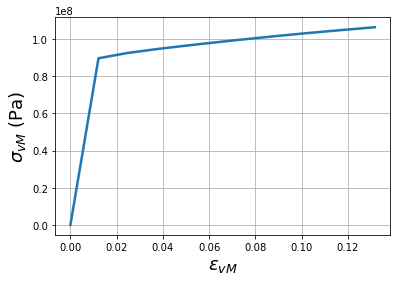

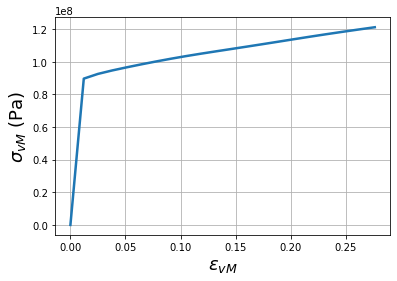

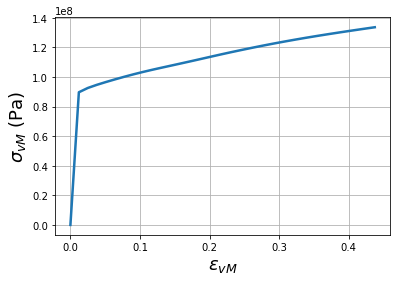

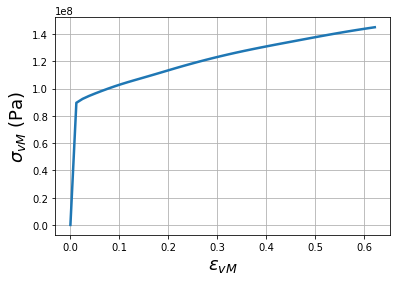

In [8]:
job.run_rolling()

In [9]:
for result in job._rollresults:
    print(result)
    print('-----------------------------------------')

Created by DAMASK_grid v3.0.0-alpha6
        on 2022-09-13 08:03:06+0200
 executing "DAMASK_grid -g damask.vti -l rolling-1.yaml"

increment_0 (0.0 s)
  phase
    Aluminum
      mechanical
        F / 1: deformation gradient
        F_e / 1: elastic deformation gradient
        F_p / 1: plastic deformation gradient
        L_p / 1/s: plastic velocity gradient
        O / q_0 (q_1 q_2 q_3): crystal orientation as quaternion
        P / Pa: first Piola-Kirchhoff stress
        epsilon_V^0.0(F) / 1: strain tensor of F (deformation gradient)
        epsilon_V^0.0(F)_vM / 1: Mises equivalent strain of epsilon_V^0.0(F) (strain tensor of F (deformation gradient))
        sigma / Pa: Cauchy stress calculated from P (first Piola-Kirchhoff stress) and F (deformation gradient)
        sigma_vM / Pa: Mises equivalent stress of sigma (Cauchy stress calculated from P (first Piola-Kirchhoff stress) and F (deformation gradient))
        xi_sl / Pa: resistance against plastic slip
  homogenization
    